# Sachin Badole 

# The Sparks Foundation Internship Task 02 

# Problem: To Explore Supervised Learning
In this regression task we will predict the percentage of
marks that a student is expected to score based upon the
number of hours they studied.

In [1]:
 #importing libraries 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Data collection 

In [2]:
url = 'http://bit.ly/w-data'
data = pd.read_csv(url)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.describe()


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 480.0 bytes


In [6]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

# DATA VISUALIZATION 

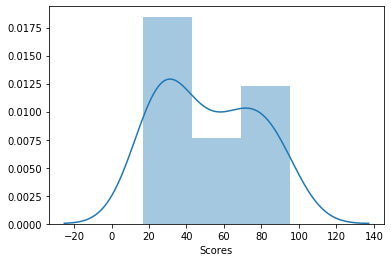

In [7]:
sns.distplot(data['Scores'])

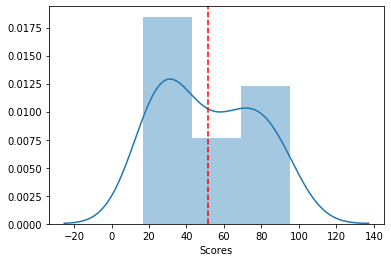

In [8]:
sns.distplot(data['Scores'])
plt.axvline(x=np.mean(data['Scores']), c='red', ls='--', label='mean')

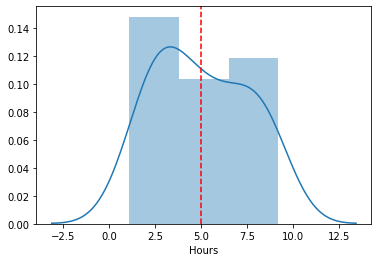

In [9]:
sns.distplot(data['Hours'])
plt.axvline(x= np.mean(data['Hours']), c='red', ls='--', label ='mean')

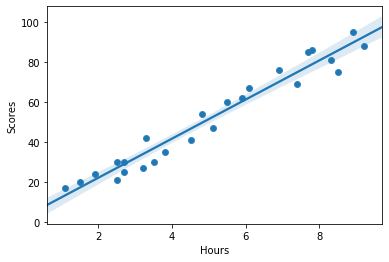

In [10]:
sns.scatterplot(data['Hours'], data['Scores'])
sns.regplot(data['Hours'], data['Scores'])

# We can see that their is clear linear relationship between number of hours studied and ppercentage of score.

# Preparing the data

The next step is to divide the data into "attributes"(inputs) and "labels"(outputs)

In [11]:
X = data.drop(['Scores'], axis = 1)
y= data['Scores']

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [12]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

# Training the data

In [13]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


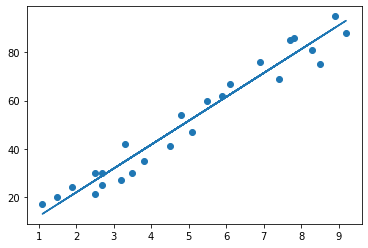

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

# Making the prediction

Now that we have trained our algorithm, it's time to make some predictions

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [16]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [17]:
print(f'The Train score: {regressor.score(X_train,y_train)}')
print(f'The Test score: {regressor.score(X_test,y_test)}')


The Train score: 0.9515510725211553
The Test score: 0.9454906892105356


# Predicting the score if a student studies given number of hours. 


In [20]:
hours = [9.25]
hours = pd.DataFrame(hours,columns=['Hours'])
predicted = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(predicted))

No of Hours =    Hours
0   9.25
Predicted Score = [93.69173249]


# Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset

In [19]:
from sklearn import metrics
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


mean absolute error: 4.183859899002975
mean squared error: 21.5987693072174
root mean squared error: 4.6474476121003665
